<a href="https://colab.research.google.com/github/TrevorSeestedt/CSCE580-Fall2024-TrevorSeestedt-Repo/blob/main/Quiz1_Response_Q3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Question 3: Resume Excerice - Word Procesing
In this notebook, I am analyzing my resume to find the most frequently used words along with the exclusion of common stop words. The following is the code I have written with their results.

Saving test.pdf to test.pdf


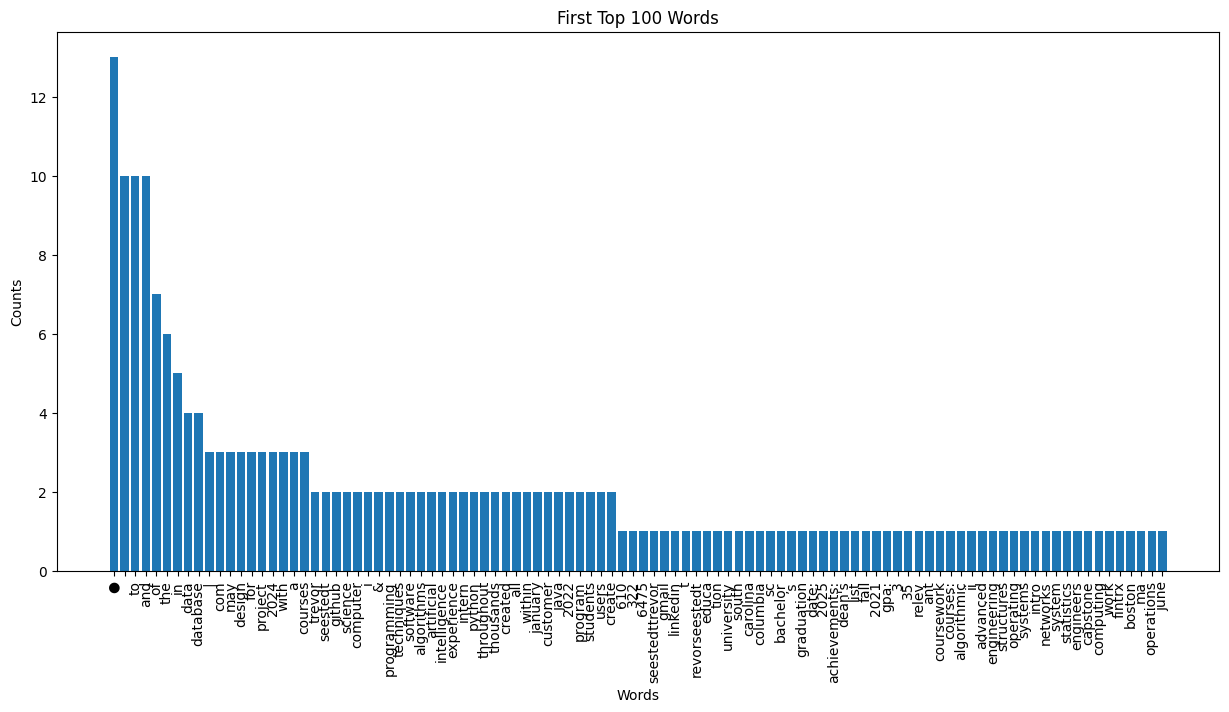

In [ ]:
!pip install PyPDF2
from google.colab import files
uploaded = files.upload()

# importing libraries
import PyPDF2
import re
from collections import Counter
import matplotlib.pyplot as plt

# Extract text from the pdf file
def extract_text_from_pdf(pdf_file:str) -> [str]:
    with open(pdf_file, 'rb') as pdf:
        reader = PyPDF2.PdfReader(pdf, strict=False)
        pdf_text = []

        for page in reader.pages:
            content = page.extract_text()
            pdf_text.append(content)

        return pdf_text

if __name__ == '__main__':
    extracted_text = extract_text_from_pdf('test.pdf')
    all_unfiltered_words = [] # unfiltered array of words
    # splitting all of the extracted words to make them individual
    for text in extracted_text:
        split_message = re.split(r'\s+|[,;?!.-]\s*|[()@/]', text.lower())

    #FIRST HISOGRAM
    all_unfiltered_words.extend(split_message)
    first_word_counts = Counter(all_unfiltered_words)
    first_top_100_words = first_word_counts.most_common(100)    # top 100 words of the resume
    words1, counts1 = zip(*first_top_100_words)    # seperate words from counts for plot

    # Plotting First histogram
    plt.figure(figsize=(15, 7))
    plt.bar(words1, counts1)
    plt.xlabel('Words')
    plt.ylabel('Counts')
    plt.title('First Top 100 Words')
    plt.xticks(rotation=90)
    plt.show()

Filtered Word Count

Saving test.pdf to test (1).pdf


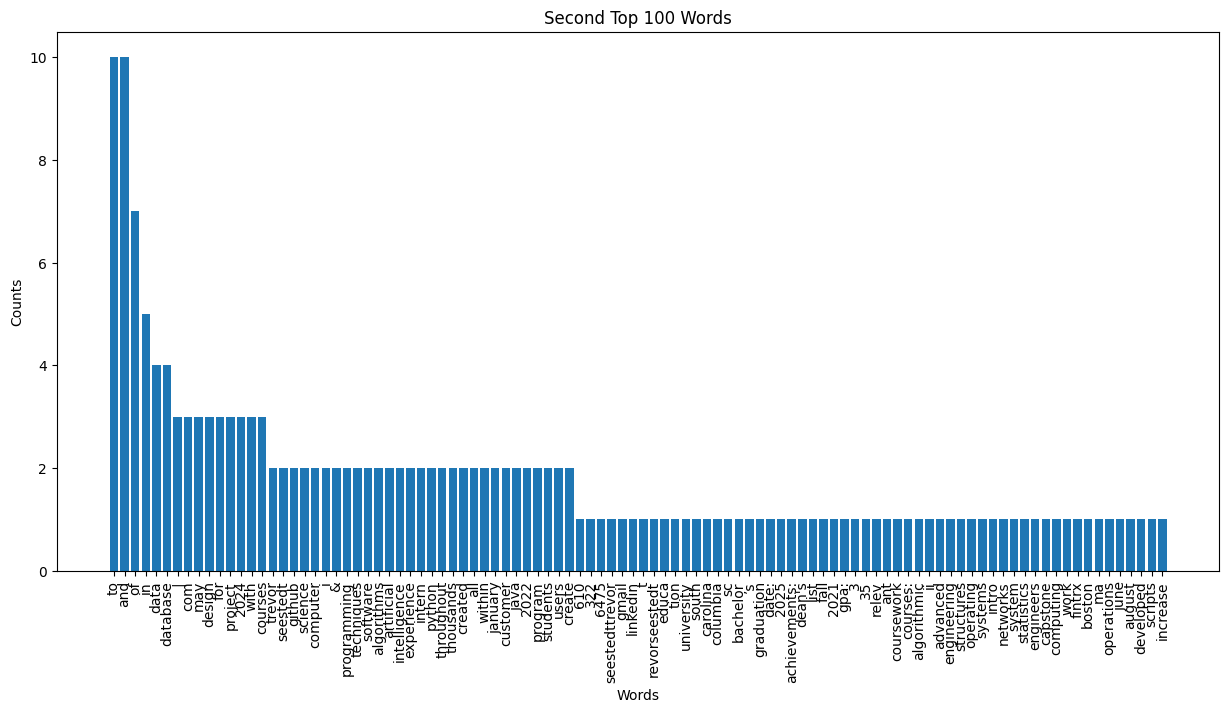

In [ ]:
!pip install PyPDF2
from google.colab import files
uploaded = files.upload()

# importing libraries
import PyPDF2
import re
from collections import Counter
import matplotlib.pyplot as plt

# Extract text from the pdf file
def extract_text_from_pdf(pdf_file:str) -> [str]:
    with open(pdf_file, 'rb') as pdf:
        reader = PyPDF2.PdfReader(pdf, strict=False)
        pdf_text = []

        for page in reader.pages:
            content = page.extract_text()
            pdf_text.append(content)

        return pdf_text

if __name__ == '__main__':
    # stop words/characters to remove
    stop_words = {'a', 'an', 'the', '●', ''}

    extracted_text = extract_text_from_pdf('test.pdf')
    all_filtered_words = [] # filtered array of words
    # splitting all of the extracted words to make them individual
    for text in extracted_text:
        split_message = re.split(r'\s+|[,;?!.-]\s*|[()@/]', text.lower())

    # SECOND HISTOGRAM
    resume_words = [word for word in split_message if word not in stop_words] # filtering out the stop words
    all_filtered_words.extend(resume_words)
    second_word_counts = Counter(all_filtered_words)    # counter of all words
    second_top_100_words = second_word_counts.most_common(100)  # top 100 words of the resume
    words2, counts2 = zip(*second_top_100_words)    # seperate words from counts for plot

    # Plotting Second histogram
    plt.figure(figsize=(15, 7))
    plt.bar(words2, counts2)
    plt.xlabel('Words')
    plt.ylabel('Counts')
    plt.title('Second Top 100 Words')
    plt.xticks(rotation=90)
    plt.show()




Observation: There is a clear difference between the two histograms due to the elimination of the stop words as they were most common. Thus, we lost the maximum or most common value, however, there is a similarity as the structure of the two histograms are nearly identical.  

# Question 3: Resume Exercise - Word Tag Cloud
The following are the results from the word tag cloud exercise for task 1, processing my own Resume into a word tag cloud.



In [ ]:
!pip install tika

from tika import parser
def convertPdf2TxtWithTika(in_pdf_file, out_text_file):
    # Load a file and extract information
    print ("INFO: - reading file = " + in_pdf_file)

    raw = parser.from_file(in_pdf_file)
    text = raw['content']

    text = str(text)
    # Ensure text is utf-8 formatted
    safe_text = text.encode('utf-8', errors='ignore')
    # Escape any \ issues
    safe_text = str(safe_text).replace('\\', '\\\\').replace('"', '\\"')

    # Write out extracted content
    text_pdf = open(out_text_file, 'w')
    print ("INFO: - writing file = " + out_text_file)
    text_pdf.write(text)
    text_pdf.close()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

import os
import glob

txtfiles = []
inpath = '/content/drive/MyDrive/StudentResumes/input/'
outpath = '/content/drive/MyDrive/StudentResumes/output/'
count = 0
for file in glob.glob(inpath + '*.pdf'):
    justfile = os.path.basename(file)
    justfile = justfile.replace(".pdf","")
    print('INFO: processing file = ' + os.path.basename(file))
    output_file = outpath + justfile + '.txt'
    print('INFO: - in = ' + file + ', out = ' + output_file)
    convertPdf2TxtWithTika(file, output_file)
    count = count + 1
print('INFO: processed total files = ' + str(count))

2024-09-16 20:30:18,490 [MainThread  ] [INFO ]  Retrieving http://search.maven.org/remotecontent?filepath=org/apache/tika/tika-server-standard/2.6.0/tika-server-standard-2.6.0.jar to /tmp/tika-server.jar.
INFO:tika.tika:Retrieving http://search.maven.org/remotecontent?filepath=org/apache/tika/tika-server-standard/2.6.0/tika-server-standard-2.6.0.jar to /tmp/tika-server.jar.


Mounted at /content/drive
INFO: processing file = AndyWaters-Resume2024 - 08.22.24.pdf
INFO: - in = /content/drive/MyDrive/StudentResumes/input/AndyWaters-Resume2024 - 08.22.24.pdf, out = /content/drive/MyDrive/StudentResumes/output/AndyWaters-Resume2024 - 08.22.24.txt
INFO: - reading file = /content/drive/MyDrive/StudentResumes/input/AndyWaters-Resume2024 - 08.22.24.pdf


2024-09-16 20:30:19,161 [MainThread  ] [INFO ]  Retrieving http://search.maven.org/remotecontent?filepath=org/apache/tika/tika-server-standard/2.6.0/tika-server-standard-2.6.0.jar.md5 to /tmp/tika-server.jar.md5.
INFO:tika.tika:Retrieving http://search.maven.org/remotecontent?filepath=org/apache/tika/tika-server-standard/2.6.0/tika-server-standard-2.6.0.jar.md5 to /tmp/tika-server.jar.md5.
2024-09-16 20:30:19,467 [MainThread  ] [WARNI]  Failed to see startup log message; retrying...
2024-09-16 20:30:24,480 [MainThread  ] [WARNI]  Failed to see startup log message; retrying...


INFO: - writing file = /content/drive/MyDrive/StudentResumes/output/AndyWaters-Resume2024 - 08.22.24.txt
INFO: processing file = Resume - Eli Bryson.pdf
INFO: - in = /content/drive/MyDrive/StudentResumes/input/Resume - Eli Bryson.pdf, out = /content/drive/MyDrive/StudentResumes/output/Resume - Eli Bryson.txt
INFO: - reading file = /content/drive/MyDrive/StudentResumes/input/Resume - Eli Bryson.pdf
INFO: - writing file = /content/drive/MyDrive/StudentResumes/output/Resume - Eli Bryson.txt
INFO: processing file = Murphy_Keenan_resume_copy.pdf
INFO: - in = /content/drive/MyDrive/StudentResumes/input/Murphy_Keenan_resume_copy.pdf, out = /content/drive/MyDrive/StudentResumes/output/Murphy_Keenan_resume_copy.txt
INFO: - reading file = /content/drive/MyDrive/StudentResumes/input/Murphy_Keenan_resume_copy.pdf
INFO: - writing file = /content/drive/MyDrive/StudentResumes/output/Murphy_Keenan_resume_copy.txt
INFO: processing file = August 2024 Ryan Karbowniczak Resume.pdf
INFO: - in = /content/dr

In [ ]:
# Now we define a function to do word cloud
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

def wordcloud_draw(data, color = 'black'):
    words = ' '.join(data)
    cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and not word.startswith('#')
                                and word != 'RT'
                            ])
    wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(cleaned_word)
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

In [ ]:
# Open file and get content for one as a sanity check
file = '/content/drive/MyDrive/StudentResumes/output/TrevorSeestedt_Resume.txt'
file_handle = open(file, 'r')
content = str( file_handle.read()).split()
file_handle.close()

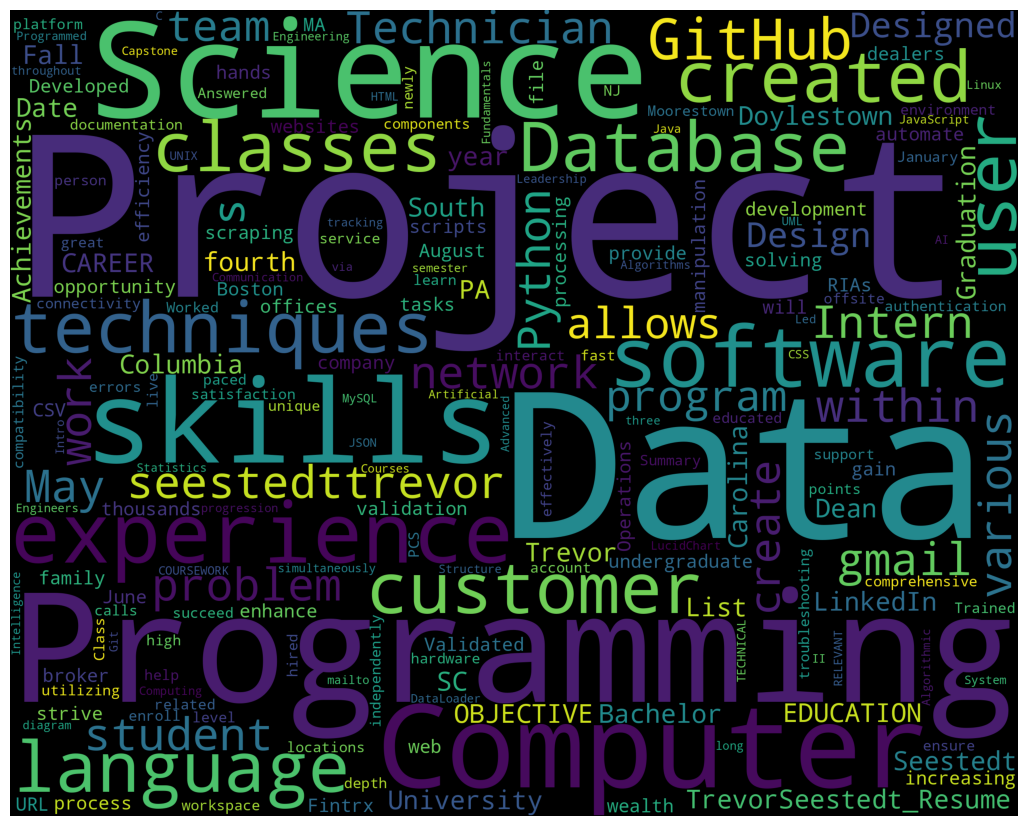

In [ ]:
wordcloud_draw(content)

In [ ]:
# Get content in all files into one string
pathFilesToUse = '/content/drive/MyDrive/StudentResumes/output/'

all_content = ''
count = 0
for file in glob.glob(pathFilesToUse + '*.txt'):
    print("file = " + file)
    file_handle = open(file, 'r')
    content = str( file_handle.read()).split()
    #content_as_str = " ".join(sorted(set(content), key=content.index))
    # Has duplicates
    content_as_str = " ".join(content)
    # All together
    all_content = all_content + content_as_str
    #all_content.append(content)
    count = count + 1
    file_handle.close()

print('INFO: processed total files = ' + str(count))

file = /content/drive/MyDrive/StudentResumes/output/AndyWaters-Resume2024 - 08.22.24.txt
file = /content/drive/MyDrive/StudentResumes/output/Resume - Eli Bryson.txt
file = /content/drive/MyDrive/StudentResumes/output/Murphy_Keenan_resume_copy.txt
file = /content/drive/MyDrive/StudentResumes/output/August 2024 Ryan Karbowniczak Resume.txt
file = /content/drive/MyDrive/StudentResumes/output/Belcher__Taylor_Resume (3).txt
file = /content/drive/MyDrive/StudentResumes/output/Resume - Duayne Wright Jr.txt
file = /content/drive/MyDrive/StudentResumes/output/Jordan_Wood_Resume.txt
file = /content/drive/MyDrive/StudentResumes/output/Nayeem Mohammad.txt
file = /content/drive/MyDrive/StudentResumes/output/MalikSiddResume2024.txt
file = /content/drive/MyDrive/StudentResumes/output/Khan Waleed Resume.txt
file = /content/drive/MyDrive/StudentResumes/output/BCS Resume.txt
file = /content/drive/MyDrive/StudentResumes/output/Dudley Hallie MSBA Resume final June 2024.txt
file = /content/drive/MyDrive/St

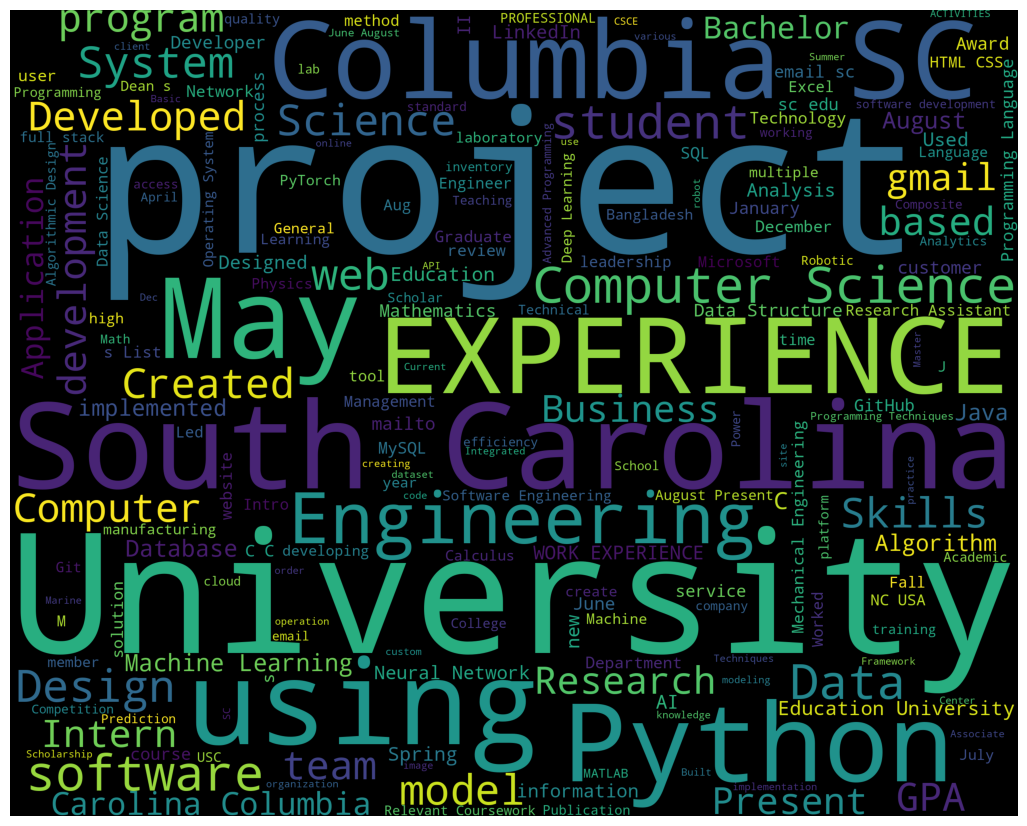

In [ ]:
wordcloud_draw(all_content.split())